<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
insurance = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
# encode female and male into 0 and 1
# encode yes and no into 1 and 0
# encode region into numbers
insurance['sex'] = LabelEncoder().fit_transform(insurance['sex'])
insurance['smoker'] = LabelEncoder().fit_transform(insurance['smoker'])
insurance['region'] = LabelEncoder().fit_transform(insurance['region'])
insurance

# alternatively
# insurance.loc[insurance['sex'] == 'female', 'sex'] = 1
# insurance.loc[insurance['sex'] == 'male', 'sex'] = 0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
import numpy as np

In [7]:
data = np.array(insurance.iloc[:,:-1])
target = np.array(insurance.iloc[:,-1])
print(data)
print(target)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# 2.) Split the data into 80/20, in/out sample

In [8]:
split = int(len(insurance)*0.8 // 1)
in_data = data[:split]
out_data = data[split:]
in_target = target[:split]
out_target = target[split:]

In [9]:
in_data

array([[19.   ,  0.   , 27.9  ,  0.   ,  1.   ,  3.   ],
       [18.   ,  1.   , 33.77 ,  1.   ,  0.   ,  2.   ],
       [28.   ,  1.   , 33.   ,  3.   ,  0.   ,  2.   ],
       ...,
       [39.   ,  1.   , 42.655,  0.   ,  0.   ,  0.   ],
       [63.   ,  1.   , 21.66 ,  1.   ,  0.   ,  1.   ],
       [54.   ,  0.   , 31.9  ,  1.   ,  0.   ,  2.   ]])

In [10]:
out_data

array([[37.   ,  1.   , 37.07 ,  1.   ,  1.   ,  2.   ],
       [63.   ,  1.   , 31.445,  0.   ,  0.   ,  0.   ],
       [21.   ,  1.   , 31.255,  0.   ,  0.   ,  1.   ],
       ...,
       [18.   ,  0.   , 36.85 ,  0.   ,  0.   ,  2.   ],
       [21.   ,  0.   , 25.8  ,  0.   ,  0.   ,  3.   ],
       [61.   ,  0.   , 29.07 ,  0.   ,  1.   ,  1.   ]])

In [11]:
in_target

array([16884.924  ,  1725.5523 ,  4449.462  , ...,  5757.41345,
       14349.8544 , 10928.849  ])

# 3.) Normalize the Data

In [12]:
from sklearn import preprocessing

In [13]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
in_data_scale

array([[-1.45390122, -1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584,  0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959,  0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872,  0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228,  0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066, -1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [14]:
from sklearn.linear_model import LassoCV

In [15]:
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_
a

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [16]:
from sklearn.linear_model import Lasso

In [17]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
prediction = mod1.predict(np.array(in_data_scale))
coef = mod1.coef_

print(prediction)
print(coef)

[24933.78011265  3864.47297708  6815.10290666 ... 12177.79520243
 11741.14195836 12360.55112834]
[3564.26137833   -0.         1890.8527485   398.24050447 9324.84227138
 -326.52198757]


# 6.) Visualize the coefficients 

In [18]:
import matplotlib.pyplot as plt

In [19]:
varlist = list(insurance.columns)[:-1]
varlist

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

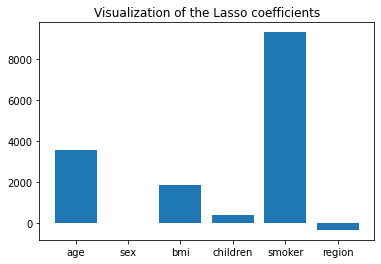

In [20]:
plt.title('Visualization of the Lasso coefficients')
plt.bar(varlist, coef, 0.8)

plt.show()

# 7.) Interpret the coefficients

According to the Lasso results, only the coefficient of variable *sex* is reduced to approximately 0. That is, the other 5 variables *age, bmi, children, smoker* and *region* all contribute to the prediction of *charges*.


Furthermore, the coefficent of region is negative, while the others are all positive. That is, other things fixed, the insurance charges, on average, are highest in the northeast, lower in the northwest, even lower in the southeast and the lowest in the southwest. Other things fixed, the insurance charges of male are expected to be higher than female, smokers higher than non-smokers. And other things fixed, the older or more kids a person is or has, the higher insurance charges on average. Last, other things fixed, the higher a person's bmi, the higher insurance charges on average. 


# 8.) Compare in and out of sample MSE’s

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
# In-sample MSE (Traning MSE)
pred_in = mod1.predict(in_data_scale)
mse_in = mean_squared_error(in_target, pred_in)
print('In-sample MSE: ', mse_in)

In-sample MSE:  36490415.101693384


In [25]:
# Out-of-sample MSE
out_data_scale = scaler.transform(out_data)
pred_out = mod1.predict(out_data_scale)
mse_out = mean_squared_error(out_target, pred_out)
print('Out-of-sample MSE: ', mse_out)

Out-of-sample MSE:  37252730.724018715


As seen from the results above, the in-sample MSE is 36490415.10, which is slightly lower than the out-of-sample MSE of 37252730.72.